In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [34]:
dataset = pd.read_csv("creditcard_2.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
dataset.shape

(284807, 31)

In [37]:
dataset.describe() # 25% 50% and 75% are first, second and third quantile respectively 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [38]:
dataset.isna().any() #data.isna()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [15]:
# To Check For Missing Values Manually
null_finder = pd.DataFrame({'Columns':dataset.isna().sum().index,'Null Values':dataset.isna().sum().values,'Percentage':dataset.isna().sum().values.dataset.shape[0]})

In [39]:
# FRAUD PERCENTAGE
fcount = 0
nfcount = 0
notFraud = dataset['Class']
for i in range(len(notFraud)):
    if notFraud[i] == 0:
        fcount+=1
    else:
        nfcount+=1
print("Fraud Count",fcount)
fraudPercent = (fcount/len(notFraud))*100
print("Percentage Of Total Not Fraud Transaction Is ", str(round(fraudPercent,2)),"%")
print("Not Fraud Count",nfcount)
nfraudPercent = (nfcount/len(notFraud))*100
print("Percentage Of Total Not Fraud Transaction Is ", str(round(nfraudPercent,2)),"%")

Fraud Count 284315
Percentage Of Total Not Fraud Transaction Is  99.83 %
Not Fraud Count 492
Percentage Of Total Not Fraud Transaction Is  0.17 %


In [40]:
plot_data = pd.DataFrame()
plot_data['Transaction'] = dataset['Class']
plot_data

,Transaction
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


<AxesSubplot:title={'center':'Bar Plot For Fraud Vs Genuine Transactions'}, xlabel='Class'>

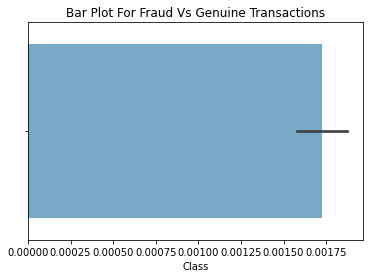

In [51]:
plt.title("Bar Plot For Fraud Vs Genuine Transactions")
sns.barplot(x='Class', data=dataset, palette = "Blues") 

<AxesSubplot:title={'center':'Count Plot For Fraud Vs Genuine Transactions'}, xlabel='Class', ylabel='count'>

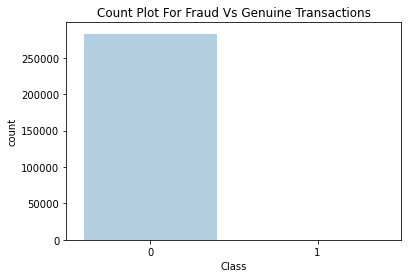

In [43]:
plt.title("Count Plot For Fraud Vs Genuine Transactions")
sns.countplot(x='Class', data=dataset, palette='Blues', edgecolor='w')

As per the graph we can say the ratio of genuine transactions are higher than fraud transactions.

Text(0.5, 1.0, 'Time Vs Amount')

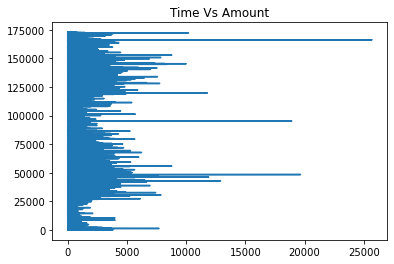

In [56]:
xdata=dataset['Amount']
ydata=dataset['Time']
plt.plot(xdata,ydata)
plt.title("Time Vs Amount")

In this graph I try to plot the relation between Time and Amount

C:\Users\yasir\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Amount Distribution'}, xlabel='Amount', ylabel='Density'>

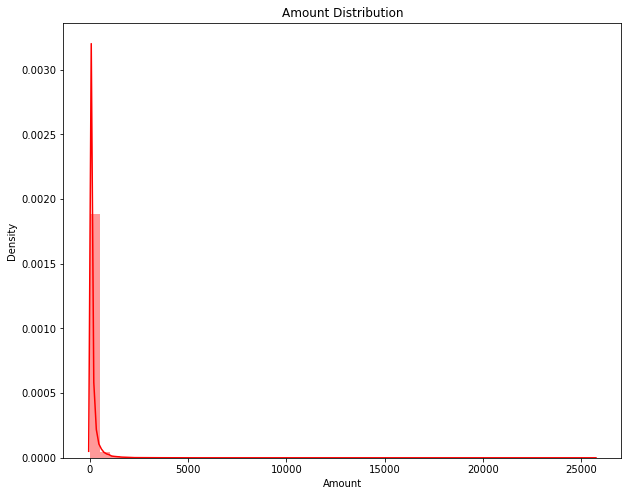

In [64]:
plt.figure(figsize=(10,8))
plt.title("Amount Distribution")
sns.distplot(dataset['Amount'],color='red')

From this amount distribution curve it is shown that the number high amount transactions are very low. So there is high probability for huge transactions to be fraudlulent.

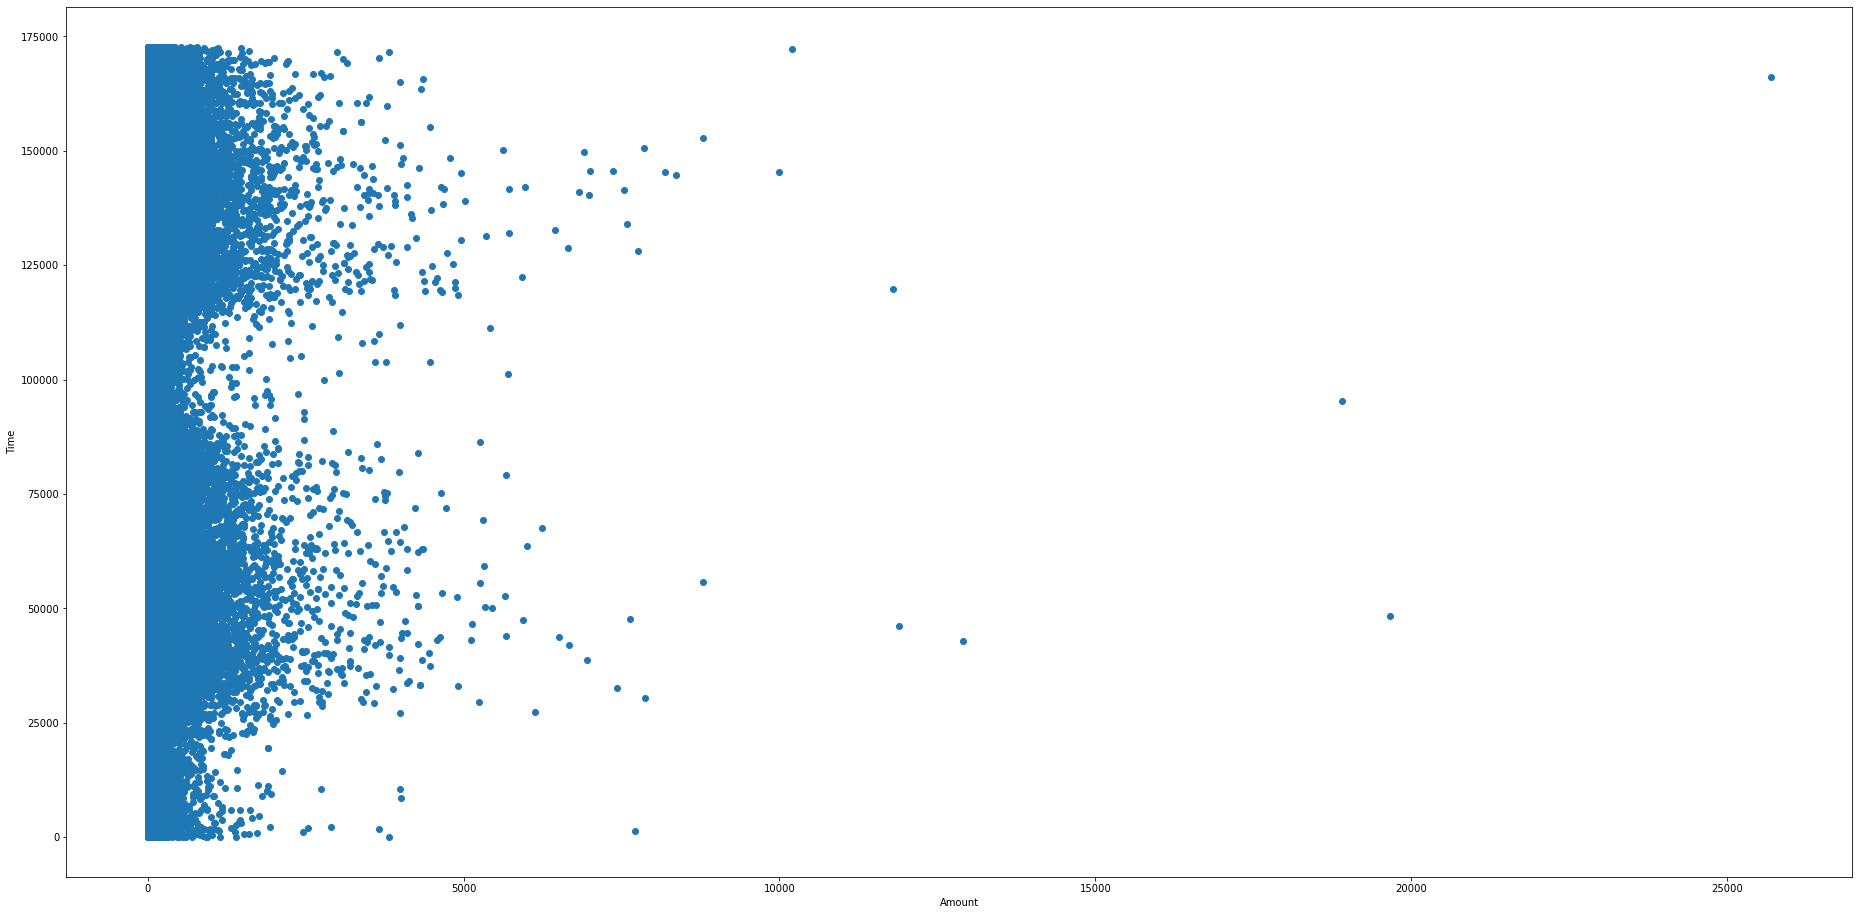

In [68]:
# SCATTERPLOT
fig, ax = plt.subplots(figsize=(32,16))
ax.scatter(dataset['Amount'], dataset['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

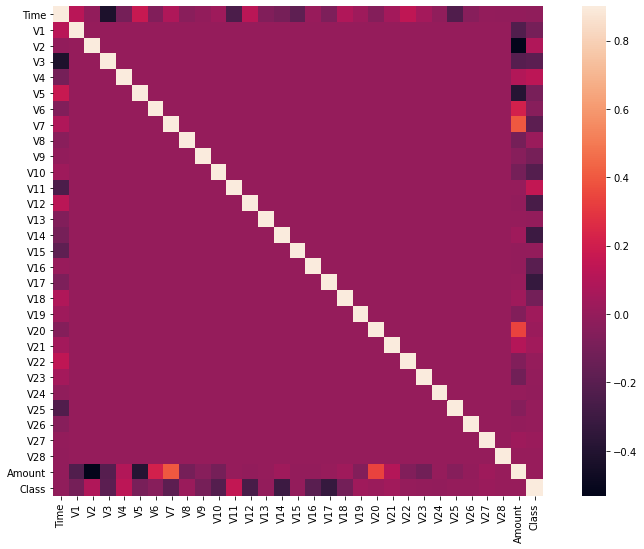

In [70]:
# CORRELATION MATRIX
correlation_metrics = dataset.corr()
fig = plt.figure(figsize = (14,9))
sns.heatmap(correlation_metrics, vmax=0.9, square=True)
plt.show()

Correlation metrics help us to understand the core relation between two attributes.

 To start with modeling First we need to split the dataset
 80% --> 80% of the data will use to train the model
 20% --> 20% to validate the model

In [76]:
x=dataset.drop(['Class'],axis=1) # Drop The Target Variable 
y=dataset['Class']
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [77]:
# SHAPES
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(227845, 30)
(227845,)
(56962, 30)
(56962,)


In [80]:
logisreg = LogisticRegression()

In [81]:
logisreg.fit(xTrain, yTrain)

C:\Users\yasir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred = logisreg.predict(xTest)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
cm = metrics.confusion_matrix(yTest, y_pred)
print(cm)

[[56836    28]
 [   47    51]]


In [87]:
accuracy = logisreg.score(xTest,yTest)
print("Accuracy Of Model Is ",round(accuracy*100,2),"%")

Accuracy Of Model Is  99.87 %


In [96]:
preds2list = yTest.tolist()
print(type(preds2list))

<class 'list'>


In [92]:
print(type(y_pred))

<class 'numpy.ndarray'>


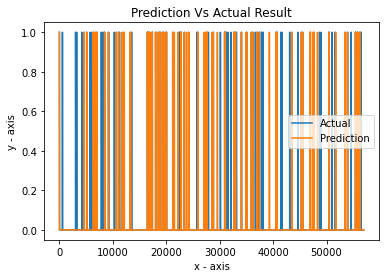

In [108]:
plt.plot(preds2list,  label = "Actual")
plt.plot(y_pred, label = "Prediction")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Prediction Vs Actual Result')
plt.legend()
plt.show()